In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('../data/income_data.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


1. age: Edad del individuo (tipo: entero, sin valores nulos).
2. workclass: Categoría de clase de trabajo del individuo (tipo: cadena de texto, sin valores nulos).
3. fnlwgt: Peso final de la muestra, utilizado para ajustar la representatividad de los datos (tipo: entero, sin valores nulos).
4. education: Nivel educativo alcanzado por el individuo (tipo: cadena de texto, sin valores nulos).
5. educational-num: Número asociado al nivel educativo (tipo: entero, sin valores nulos).
6. marital-status: Estado civil del individuo (tipo: cadena de texto, sin valores nulos).
7. occupation: Ocupación laboral del individuo (tipo: cadena de texto, sin valores nulos).
8. relationship: Relación familiar del individuo dentro del hogar (tipo: cadena de texto, sin valores nulos).
9. race: Raza del individuo (tipo: cadena de texto, sin valores nulos).
10. gender: Género del individuo (tipo: cadena de texto, sin valores nulos).
11. capital-gain: Ganancia de capital obtenida por el individuo (tipo: entero, sin valores nulos).
12. capital-loss: Pérdida de capital sufrida por el individuo (tipo: entero, sin valores nulos).
13. hours-per-week: Número de horas trabajadas por semana (tipo: entero, sin valores nulos).
14. native-country: País de origen del individuo (tipo: cadena de texto, sin valores nulos).
15. income: Categoría de ingreso del individuo (<=50K o >50K) (tipo: cadena de texto, sin valores nulos).

 Estadisticas descriptivas

In [7]:
df.describe(percentiles=[0.01,0.1,0.25,.5,.75,0.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
age,48842.0,38.643585,13.710510,17.0,17.0,22.0,28.0,37.0,48.0,58.0,74.00,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,27166.0,65738.2,117550.5,178144.5,237642.0,328466.0,509484.42,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,3.0,7.0,9.0,10.0,12.0,13.0,16.00,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15024.00,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001.00,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,8.0,24.0,40.0,40.0,45.0,55.0,80.00,99.0


 Edad 
- Tiene una media de 38.64 años y una desviación estándar de 13.71, lo que indica una dispersión moderada.
- El mínimo es 17 y el máximo 90.
- La mediana es 37.
- El 75% de los casos tiene menos de 48 años, lo que indica que la mayoría de la población es relativamente joven o de mediana edad.

---

 Peso Final(fnlwgt) 
- Media de 189,664 y desviación estándar muy alta (105,604), lo que refleja una alta variabilidad.
- El valor máximo alcanza 1,490,400, mientras que el mínimo es 12,285, lo cual evidencia la presencia de outliers.
- Variable a considerar ser elimidada

---

 Nivel Educativo Numérico 
- Media de 10.08 años de educación formal, con una desviación estándar de 2.57.
- El valor mínimo es 1 y el máximo 16.
- La mediana es 10, y el 75% de los datos tienen hasta 12 años de educación, una concentración media.
- Distribución ligeramente sesgada hacia la izquierda (más personas con niveles intermedios que extremos).

---

 Ganancia de Capital 
- Aunque la media es 1,079, la desviación estándar es muy alta (7,452), señalando una gran dispersión.
- La mediana es 0, lo que significa que la mayoría de los individuos no presentan ganancias de capital.
- El máximo es 99,999, y solo un pequeño porcentaje tiene ganancias altas, por lo que la variable presenta una distribución altamente sesgada.

---

 Pérdida de Capital 
- Similar a la variable anterior, tiene una media baja de 87.5 pero una desviación alta de 403.
- La mediana también es 0, con valores máximos de hasta 4,356.
- Esto indica que la mayoría de las personas no reportan pérdidas de capital, pero hay algunos casos con pérdidas elevadas, lo que provoca una fuerte asimetría.

---

 Horas Trabajadas por Semana 
- Media de 40.42 horas, con una desviación estándar de 12.39.
- La mediana es 40, lo que coincide con la jornada laboral estándar.
- El mínimo es 1 y el máximo 99, lo que sugiere algunos casos extremos (posibles outliers).
- Aunque la mayoría trabaja entre 40 y 45 horas, hay una minoría que trabaja significativamente más o menos.

---

 Conclusión General

- Las variables `capital-gain` y `capital-loss` presentan sesgos importantes y muchos ceros, por lo que podrían beneficiarse de transformaciones como aplicar logaritmos.
- `age`, `educational-num` y `hours-per-week` tienen distribuciones más estables, siendo candidatas sólidas como variables explicativas.
- `fnlwgt` variable a estudiar y posible eliminada.

In [8]:
df.mode().T

,0
age,36
workclass,Private
fnlwgt,203488
education,HS-grad
educational-num,9
marital-status,Married-civ-spouse
occupation,Prof-specialty
relationship,Husband
race,White
gender,Male


In [9]:

df.describe().T["max"] - df.describe().T["min"]

age                     73.0
fnlwgt             1478115.0
educational-num         15.0
capital-gain         99999.0
capital-loss          4356.0
hours-per-week          98.0
dtype: float64

In [25]:
num_columns= df.select_dtypes(exclude=["object"]).columns.tolist()
cat_columns= df.select_dtypes(include=["object"]).columns.tolist()
print(f"Num columns: {num_columns}")
print(f"Cat columns: {cat_columns}")

Num columns: ['age', 'final_weight', 'education_level_num', 'capital_gain', 'capital_loss', 'work_hours_per_week']
Cat columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [11]:
df[num_columns].skew().sort_values(ascending=False)

capital-gain       11.894659
capital-loss        4.569809
fnlwgt              1.438892
age                 0.557580
hours-per-week      0.238750
educational-num    -0.316525
dtype: float64

La asimetría indica qué tan simétrica es la distribución de una variable. Un valor cercano a 0 indica una distribución aproximadamente simétrica, mientras que:
- Valores positivos indican asimetría a la derecha (cola larga hacia la derecha).
- Valores negativos indican asimetría a la izquierda (cola larga hacia la izquierda).

---

 `capital-gain` 
- Altamente asimétrica a la derecha.
- Confirma que la mayoría de los individuos no tienen ganancias de capital, pero unos pocos tienen valores muy altos.
- Es una variable muy sesgada.

---

 `capital-loss`
- También presenta una asimetría positiva significativa.
- La mayoría no tiene pérdidas de capital, pero unos pocos casos sí, y con valores elevados.
- Se confirma lo dicho anteriormente: distribución muy sesgada con predominancia de ceros.

---

 `fnlwgt`
- Asimetría moderada a la derecha.
- Hay bastantes valores extremos elevados.

---

 `age`
- Ligera asimetría positiva.
- Confirma que la distribución está relativamente centrada pero con una ligera tendencia hacia edades mayores.

---

 `hours-per-week`
- Distribución casi simétrica.
- Confirma la estabilidad observada en el análisis anterior: la mayoría trabaja 40–45 horas.

---

 `educational-num`
- Ligera asimetría a la izquierda.
- Esto indica que hay una mayor concentración de personas con niveles intermedios-altos de educación.
- La asimetría es baja, así que no requiere transformación urgente.

---

In [12]:
# Calcular la curtosis
"""
valor > 0 -> distribución leptocúrtica
valor = 0 -> distribución mesocúrtica
valor < 0 -> distribución platicúrtica
"""
df[num_columns].kurt()

age                 -0.184269
fnlwgt               6.057848
educational-num      0.625745
capital-gain       152.693096
capital-loss        20.014346
hours-per-week       2.951059
dtype: float64

In [13]:
for col in cat_columns:
    print(f"Valores únicos en {col}: {df[col].nunique()}")
    print(f"Valores únicos en {col}: {df[col].unique()}")
    print(f"Frecuencia de valores en {col}:\n{df[col].value_counts()}\n")

Valores únicos en workclass: 9
Valores únicos en workclass: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Frecuencia de valores en workclass:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Valores únicos en education: 16
Valores únicos en education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Frecuencia de valores en education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th              

Observamos que hay datos nulos en occupation, workclass y native country por lo que los estudiaremos mas a fondo

Imputaremos los campos nulos por la moda ya que son un 5% de los datos y no los queremos eliminar, es decir, occupation por Prof-specialty, workclass por private y native_country por United States que es el predominante claro.

- gender	Binaria	replace (0/1)
- income (target)	Binaria	LabelEncoding (0/1)
- race		One-Hot
- relationship	One-Hot
- marital-status  One-Hot
- education	LabelEncoding
- workclass	 one-HOt
- occupation	 One-Hot
- native-country	Alta cardinalidad	Agrupar regiones + One-Hot

### Univarieta EDA

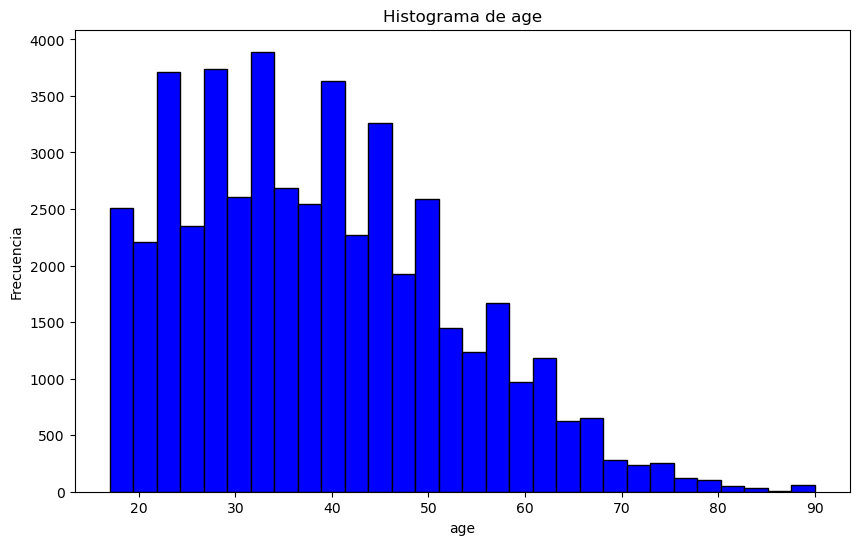

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


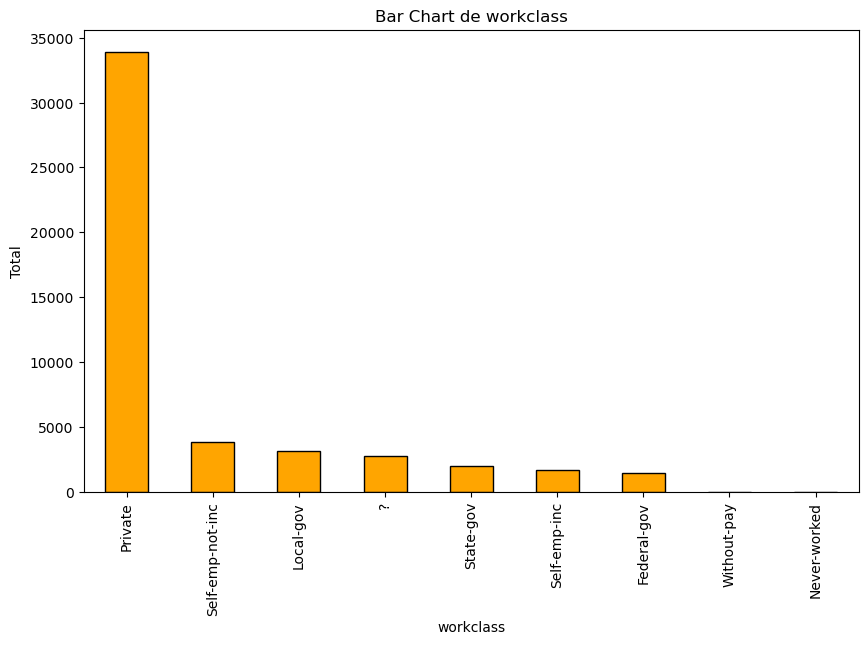

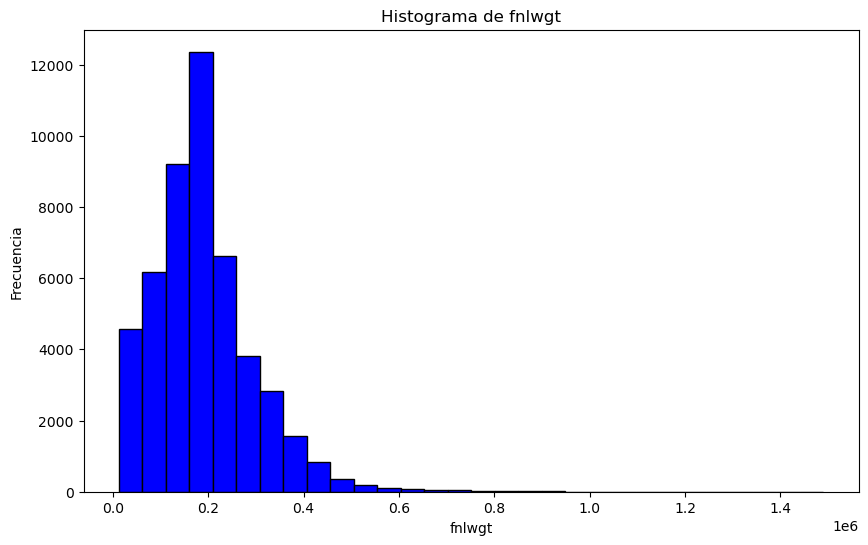

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


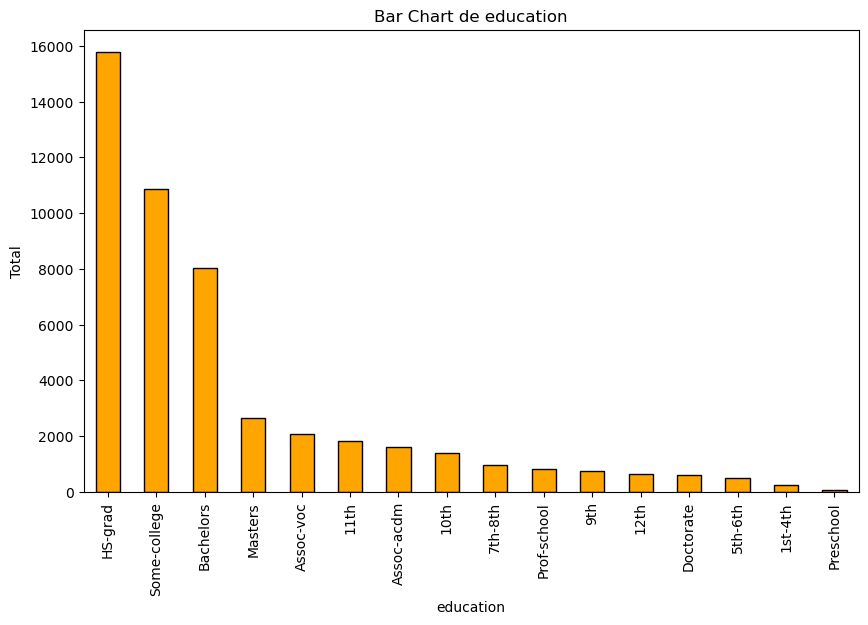

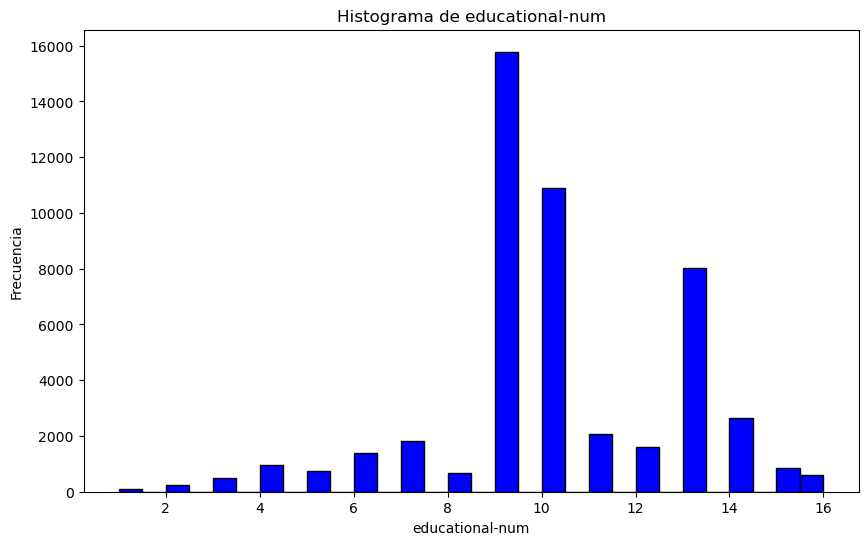

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


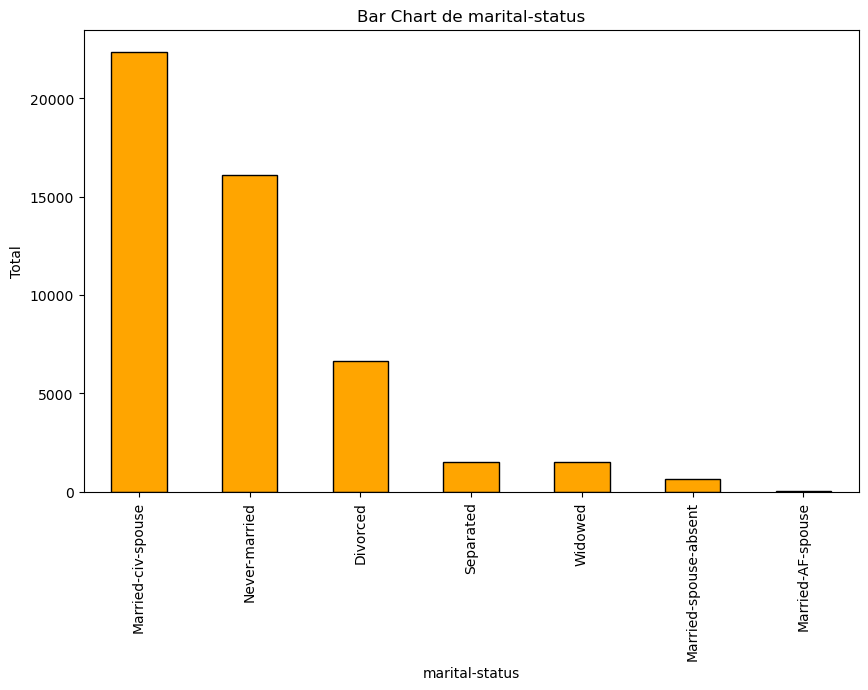

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


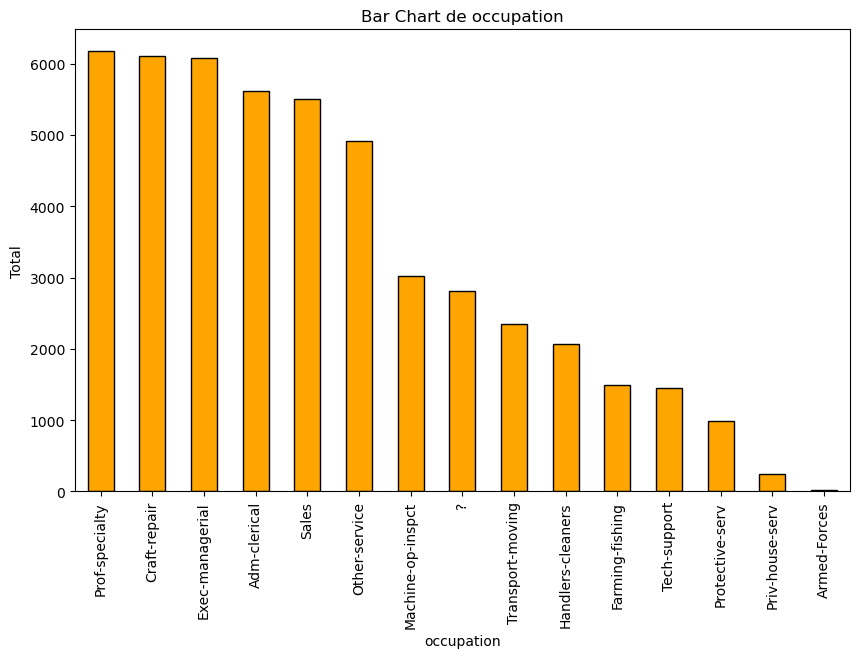

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


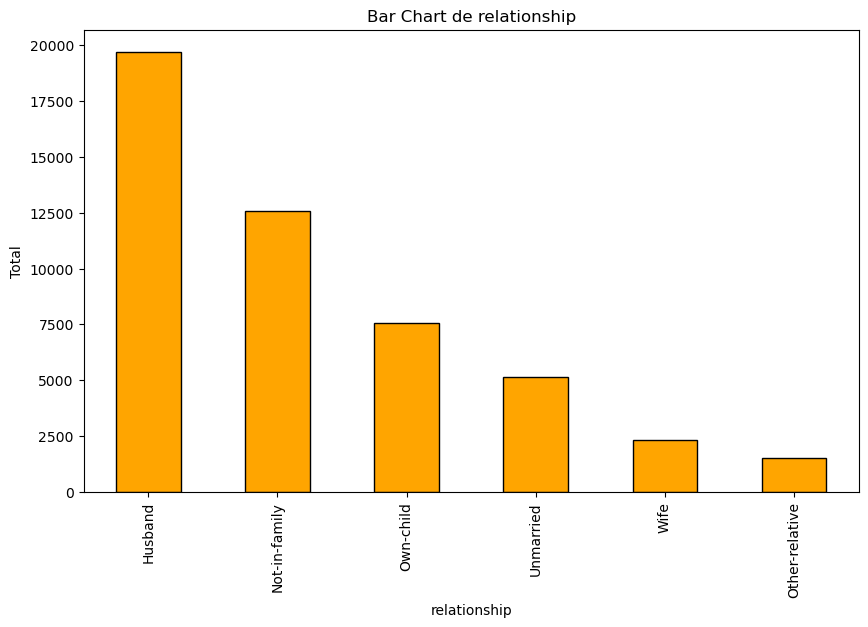

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


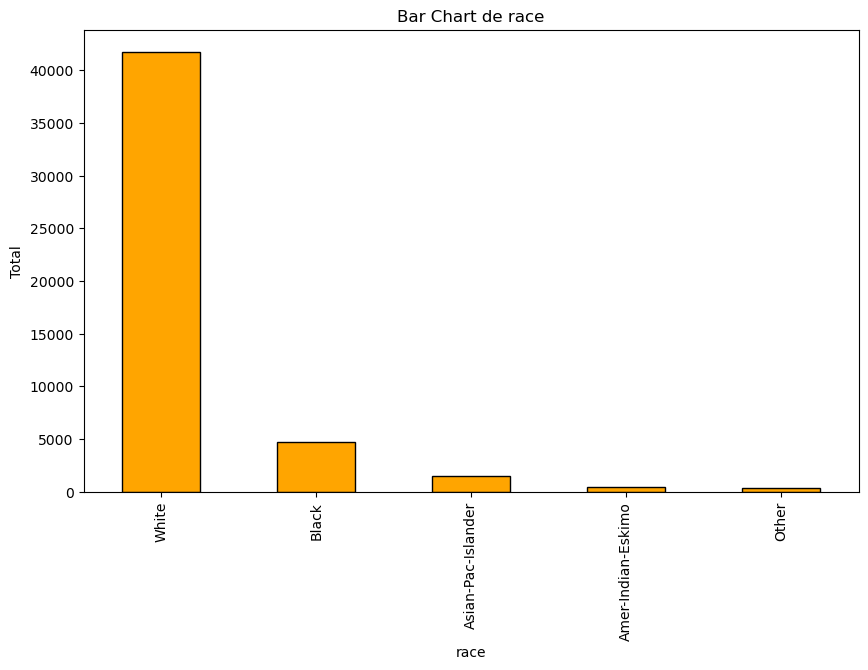

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


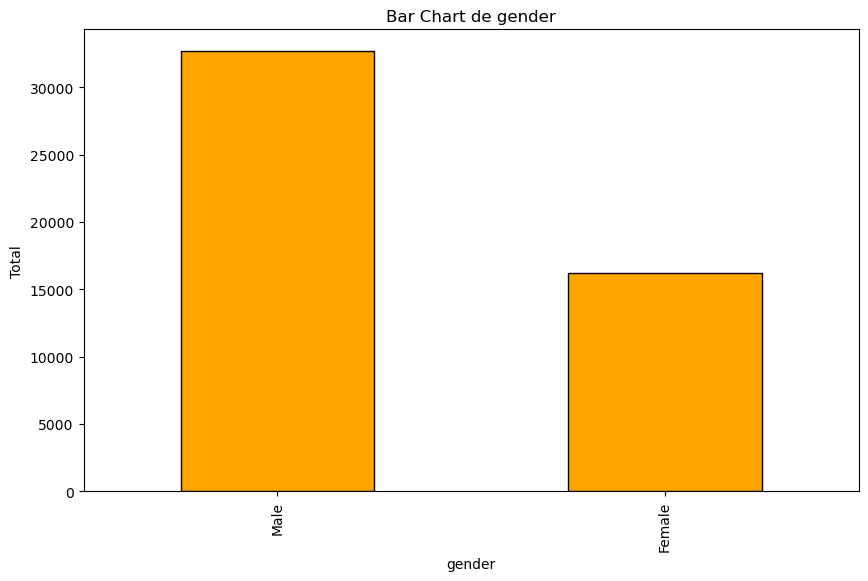

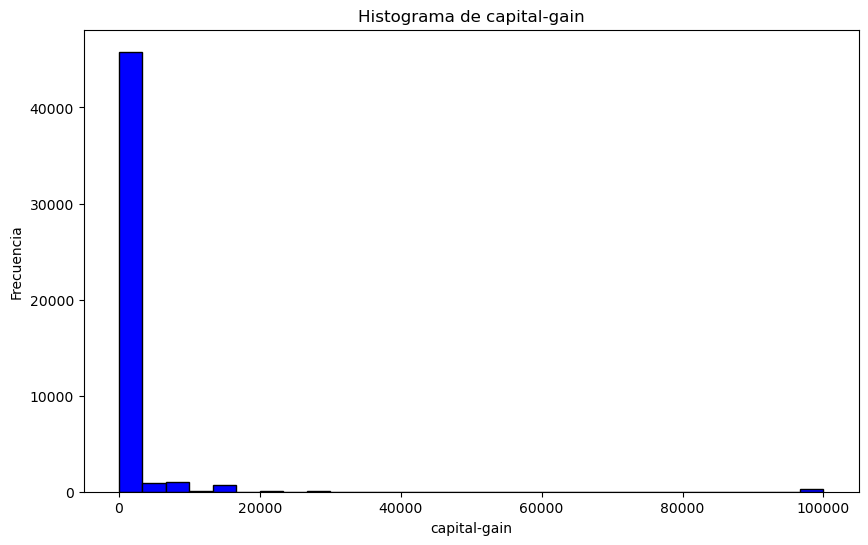

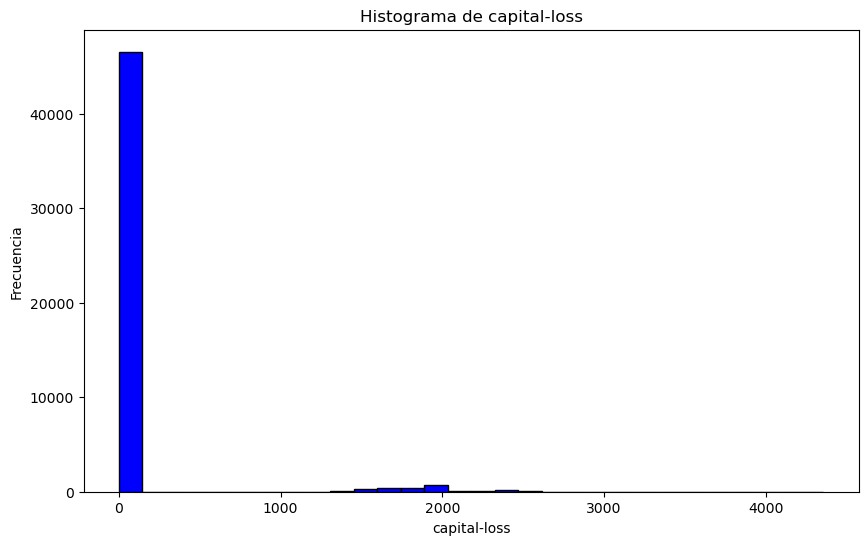

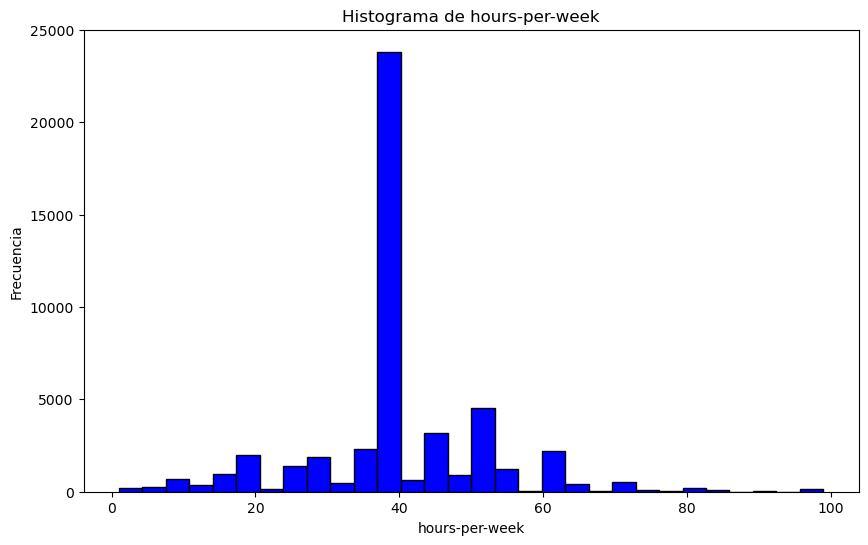

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


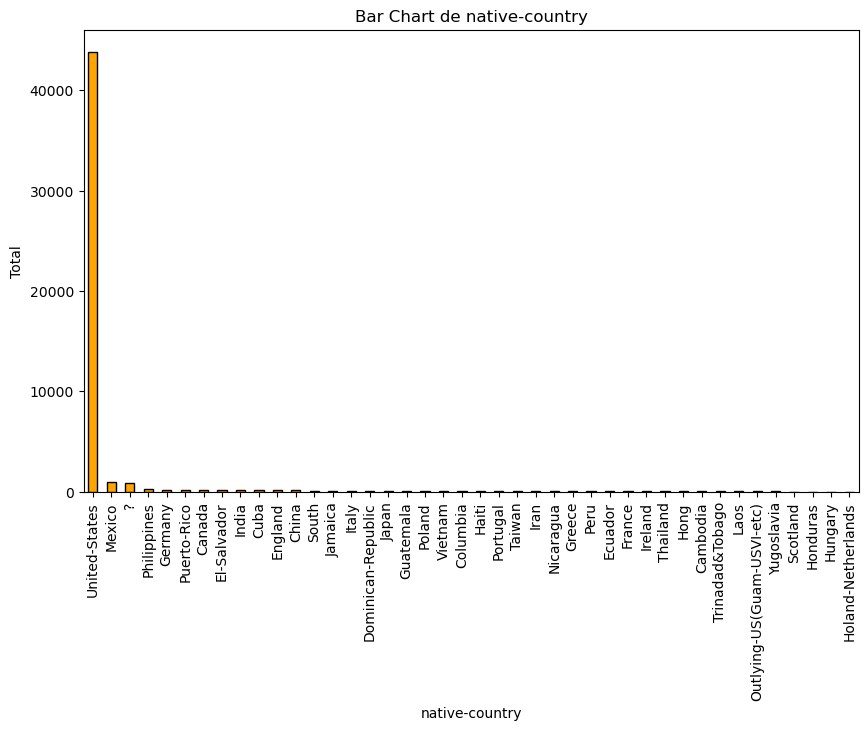

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1627422256.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


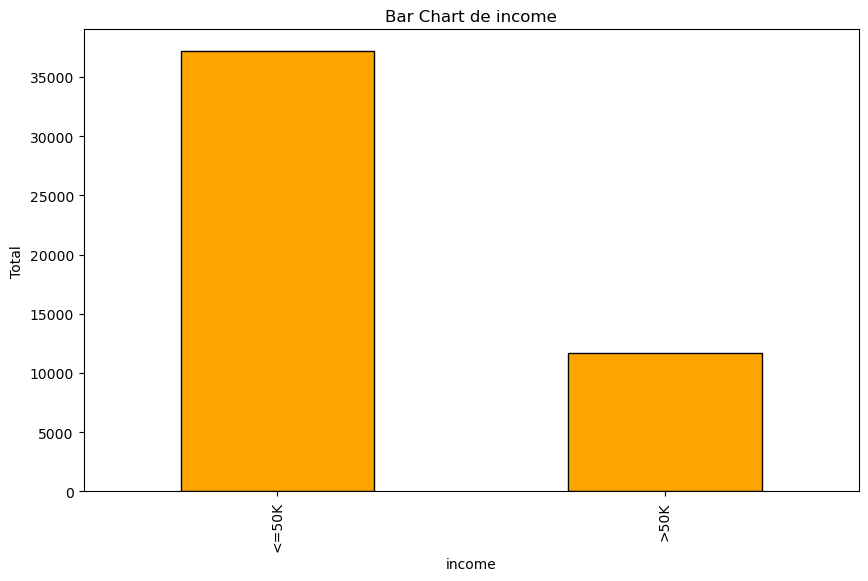

In [14]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    # Comprobación de si la columna es numérica
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.hist(df[column].dropna(), bins=30, color='blue', edgecolor='black')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
    
    # Comprobación de si la columna es categórica
    elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Bar Chart de {column}')
        plt.xlabel(column)
        plt.ylabel('Total')
    
    plt.show()

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["inconme"], color="dodgerblue", label="income", kwargs)
plt.legend()

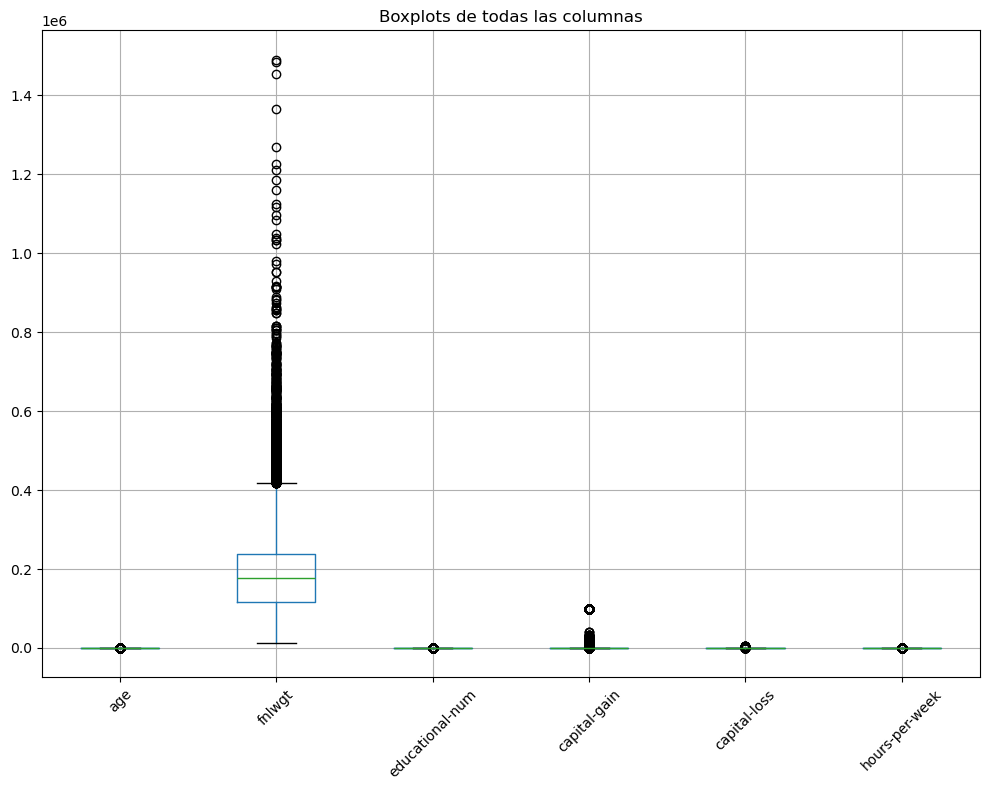

In [15]:
df.boxplot(figsize=(10, 8), rot=45)
plt.title('Boxplots de todas las columnas')
plt.tight_layout() 
plt.show()

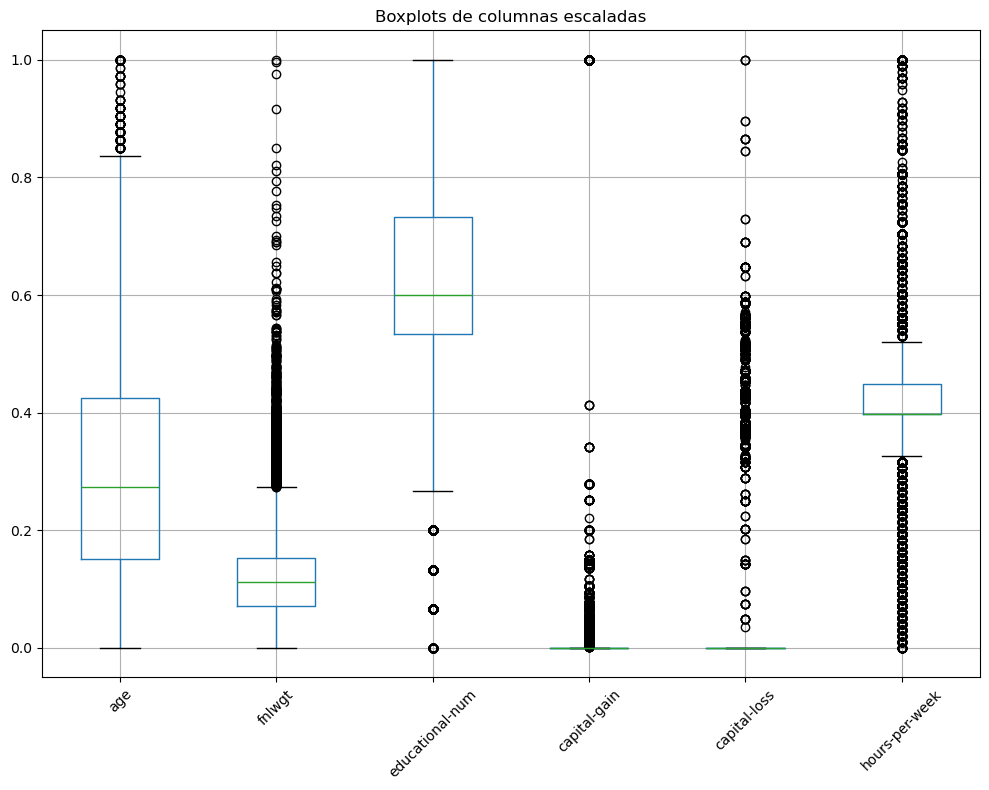

In [16]:
from sklearn.preprocessing import  MinMaxScaler
df_numeric = df[num_columns]

# Normalizamos los datos entre 0 y 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=num_columns)

# Genera boxplots para las columnas escaladas
df_scaled.boxplot(figsize=(10, 8), rot=45)
plt.title('Boxplots de columnas escaladas')
plt.tight_layout()
plt.show()

- `age`:
  - Distribución bastante concentrada entre 0.2 y 0.4.
  - Se observan outliers leves en la parte superior.

- `fnlwgt`:
  - Alta concentración en valores bajos tras la escala.
  - Gran cantidad de outliers por encima del cuartil superior, confirmando su alta varianza y presencia de extremos.

- `educational-num`:
  - Presenta una distribución más centrada y simétrica en comparación con otras variables.
  - Pocos outliers.

- `capital-gain`:
  - Gran número de valores concentrados en 0, con numerosos outliers extremos hacia arriba.
  - asimetría extrema.


- `capital-loss`:
  - Comportamiento muy similar a `capital-gain`: distribución muy sesgada con la mayoría de los valores en 0.
  - Gran cantidad de outliers hacia la parte superior.

- `hours-per-week`:
  - Distribución relativamente simétrica, con caja centrada entre 0.3 y 0.5.
  - COnfirmamamos con la prueba de skew.

---

In [23]:
df.rename(columns={
    'fnlwgt': 'final_weight',
    'educational-num': 'education_level_num',
    'capital-gain': 'capital_gain',
    'capital-loss': 'capital_loss',
    'hours-per-week': 'work_hours_per_week'
}, inplace=True)

In [24]:
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [ ]:


# Función para detectar outliers con el método IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir límites superior e inferior para los outliers
        lower_bound = Q1 - 1.5  IQR
        upper_bound = Q3 + 1.5  IQR
        
        # Identificar outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        
    return outliers

# Llamar la función para detectar outliers
outliers_count = detect_outliers_iqr(df, num_columns)
print(outliers_count)


{'age': 216, 'final_weight': 1453, 'education_level_num': 1794, 'capital_gain': 4035, 'capital_loss': 2282, 'work_hours_per_week': 13496}


### Multivariate EDA

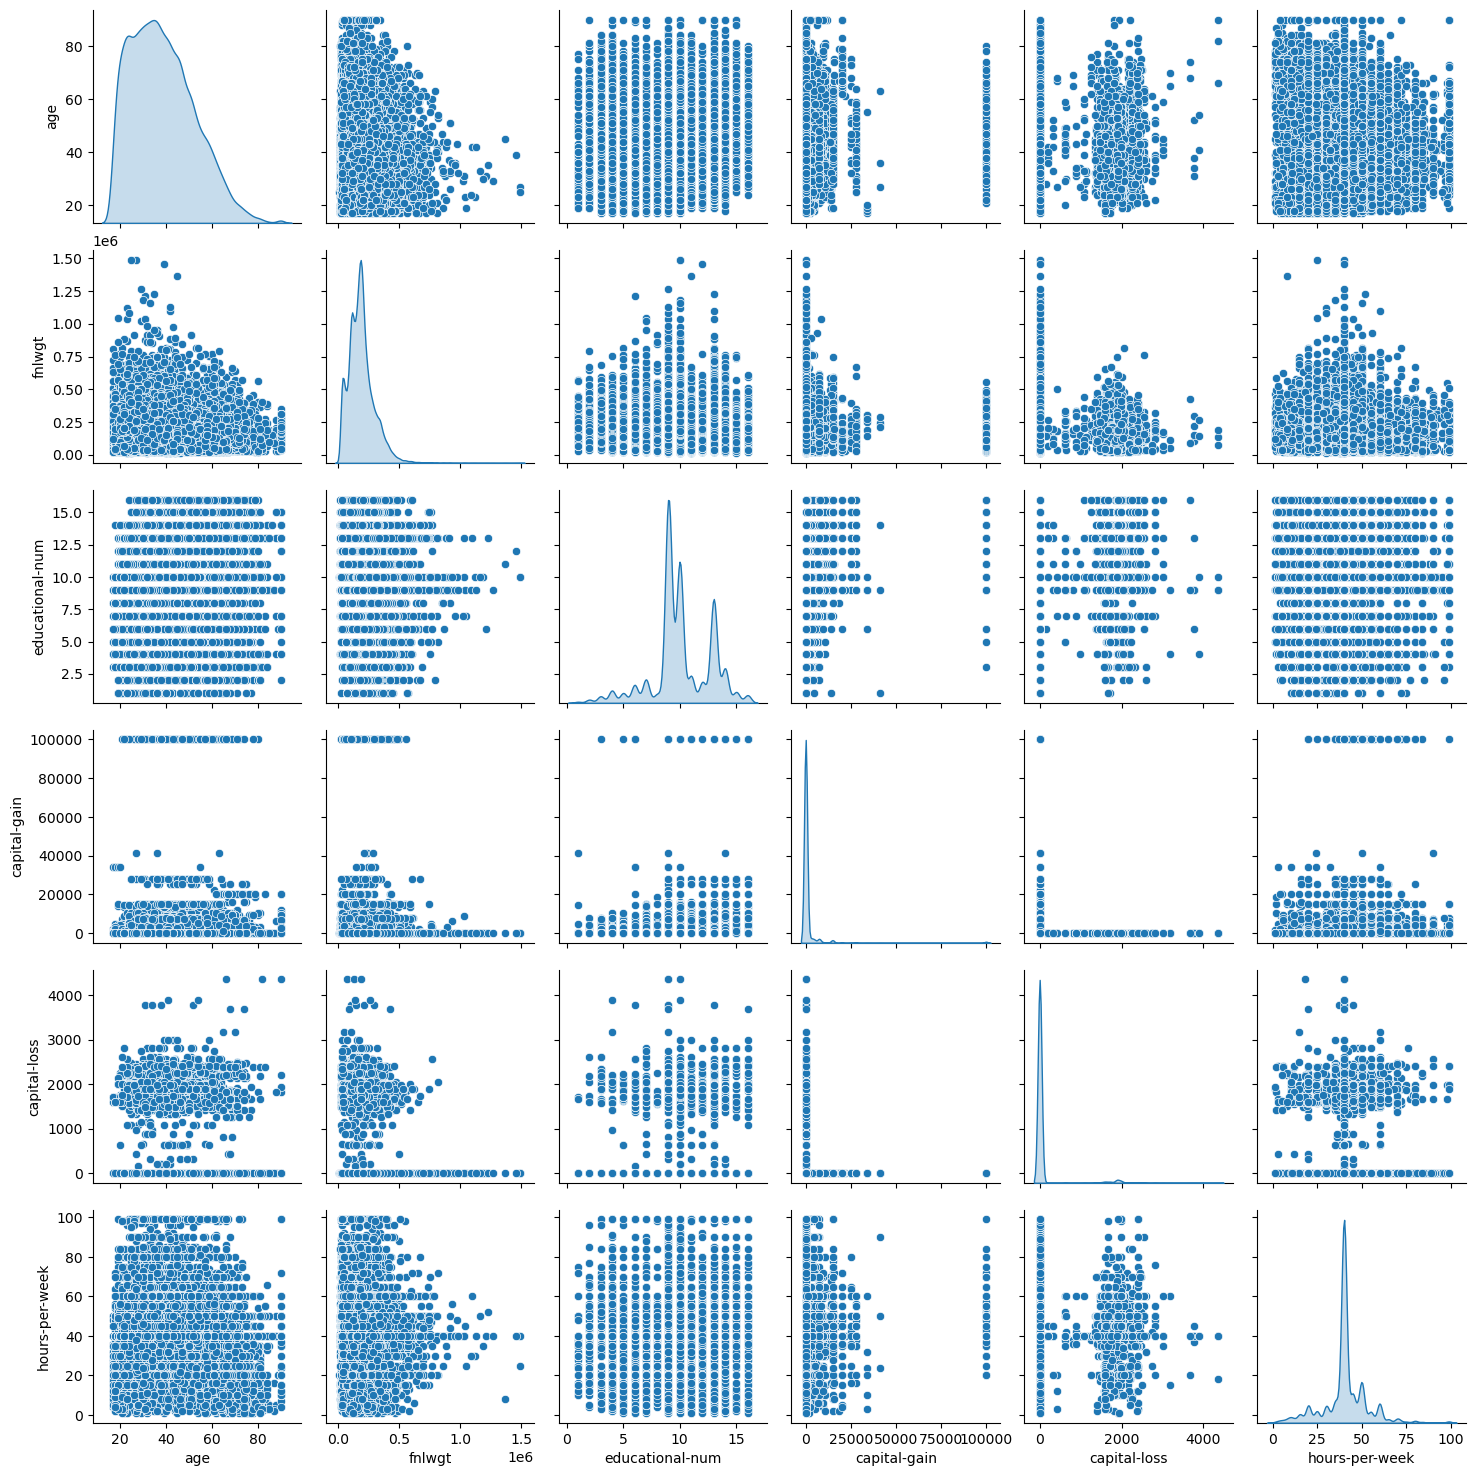

In [17]:
sns.pairplot(df[num_columns], diag_kind='kde', markers='o')

In [7]:
df_processed = df.copy()
df_processed["income"]= df_processed["income"].replace({"<=50K": 0, ">50K": 1})

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_12380\3185999787.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed["income"]= df_processed["income"].replace({"<=50K": 0, ">50K": 1})


In [10]:
df_processed["income"]=df_processed["income"].astype(int)
num_columns.append("income")
df_processed[num_columns].corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


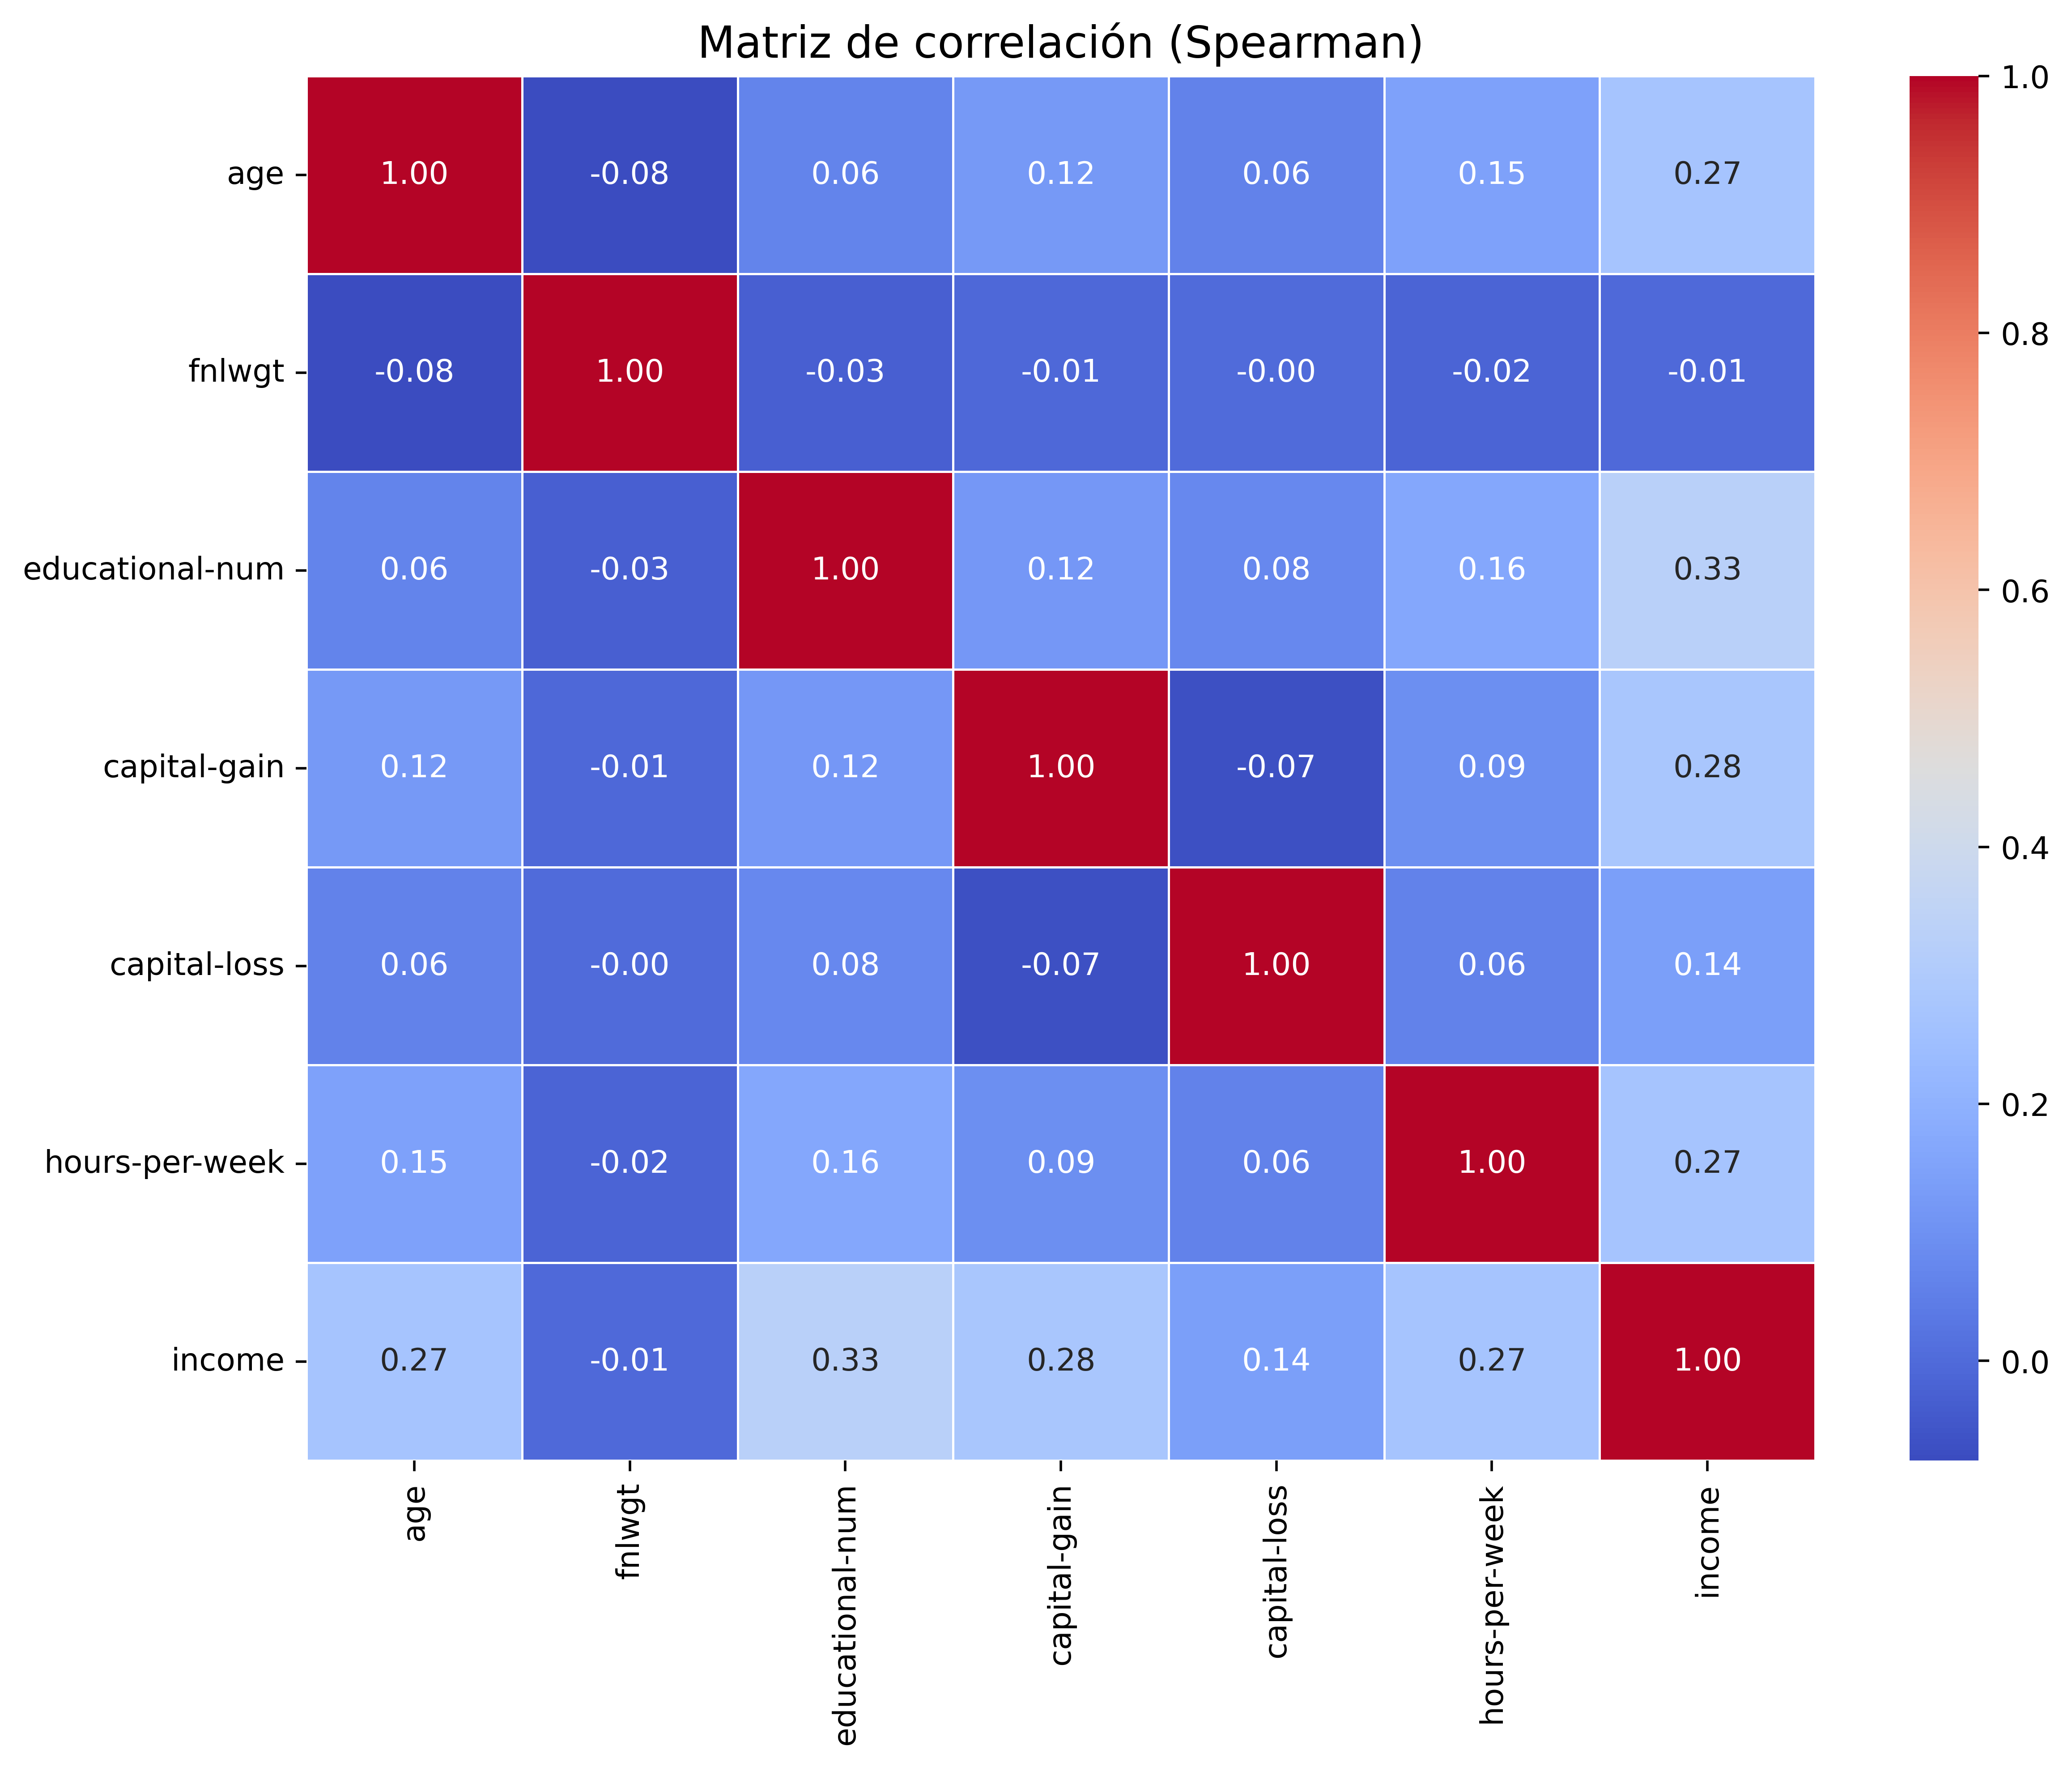

In [11]:


plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(df_processed[num_columns].corr(method='spearman'), annot=True, fmt=".2f", linewidth=0.5, cmap="coolwarm")
plt.title("Matriz de correlación (Spearman)", fontsize=14)
plt.tight_layout()
plt.show()

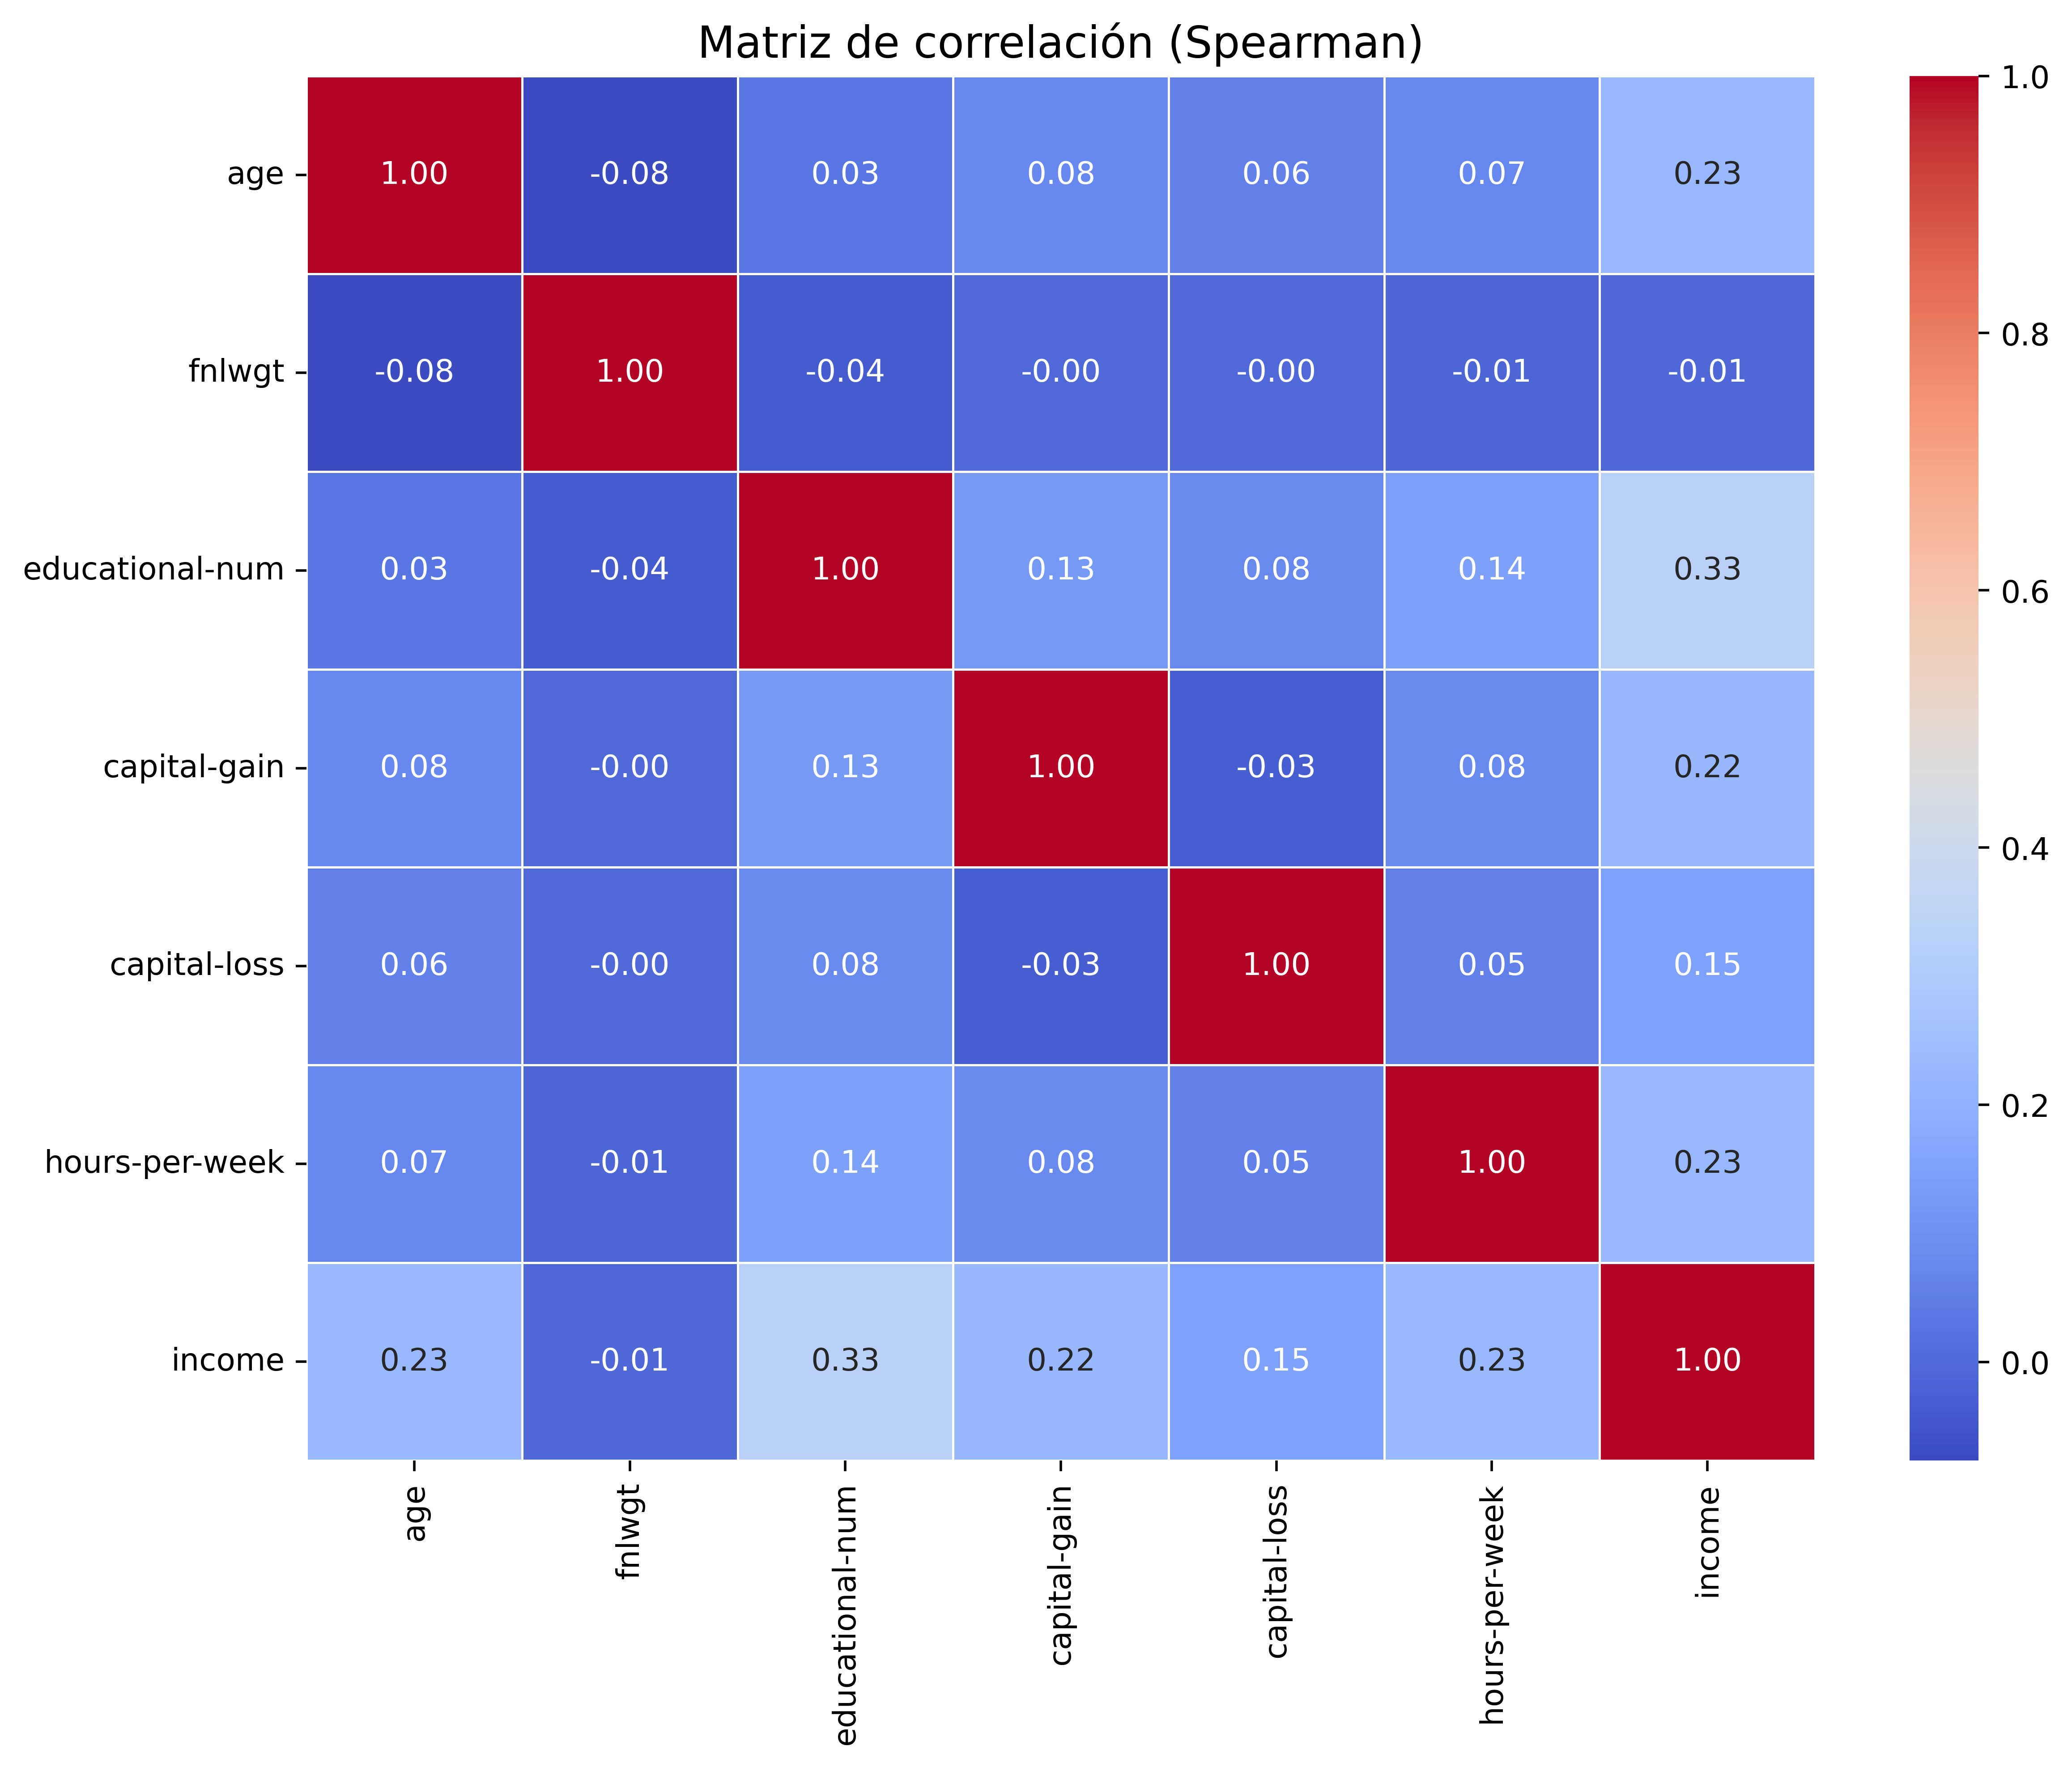

In [12]:
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(df_processed[num_columns].corr(method='pearson'), annot=True, fmt=".2f", linewidth=0.5, cmap="coolwarm")
plt.title("Matriz de correlación (Spearman)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency


def cramers_v(x, y):
    """
    Calcula Cramér's V para dos variables categóricas.
    
    Parámetros:
    - x, y: Series o arrays de pandas que representan variables categóricas.
    
    Retorna:
    - Valor de Cramér's V, entre 0 y 1.
    """
    tabla_cruzada = pd.crosstab(x, y)

    # calculamos chi2, el p valor asociado, los grados de libertad y la tabla esperada
    chi2, p, dof, expected = chi2_contingency(tabla_cruzada)
    #hacemos la suma de la tabla cruzada global para obetener el nº total de datos y normalizar 
    n = tabla_cruzada.sum().sum()
    min_dim = min(tabla_cruzada.shape) - 1 # Cálculo de la dimensión mínima
    if min_dim == 0:
        return np.nan # si una de la variable tiene solo un valor, no se puede calcular la v de cramer. Habría que eliminarla
    
    return np.sqrt(chi2 / (n  min_dim))

# Calcular Cramér's V para cada par de variables categóricas
columns = df.select_dtypes(include='object').columns.tolist()

cramers_v_results = []
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        cv = cramers_v(df[col1], df[col2])
        cramers_v_results.append((col1, col2, cv))
cramers_v_df = pd.DataFrame(cramers_v_results, columns=['col1', 'col2', 'Cramér\'s V'])
cramers_v_df['Cramér\'s V'] = cramers_v_df['Cramér\'s V'].apply(lambda x: '{:.2f}'.format(x))
cramers_v_df.sort_values(by='Cramér\'s V', ascending=False, inplace=True)
cramers_v_df.head(30)

,col1,col2,Cramér's V
27,relationship,gender,0.65
16,marital-status,relationship,0.49
18,marital-status,gender,0.46
29,relationship,income,0.45
20,marital-status,income,0.45
23,occupation,gender,0.42
31,race,native-country,0.40
2,workclass,occupation,0.40
14,education,income,0.37
25,occupation,income,0.35


In [ ]:
def cramers_v(x, y):
    """
    Calcula Cramér's V para dos variables categóricas.
    
    Parámetros:
    - x, y: Series o arrays de pandas que representan variables categóricas.
    
    Retorna:
    - Valor de Cramér's V, entre 0 y 1.
    """
    tabla_cruzada = pd.crosstab(x, y)

    # Calculamos chi2, el p valor asociado, los grados de libertad y la tabla esperada
    chi2, p, dof, expected = chi2_contingency(tabla_cruzada)

    # Número total de datos y dimensión mínima para el cálculo de Cramér's V
    n = tabla_cruzada.sum().sum()
    min_dim = min(tabla_cruzada.shape) - 1
    
    if min_dim == 0:
        return np.nan  # No se puede calcular si una variable tiene solo un valor
    
    return np.sqrt(chi2 / (n  min_dim))

# Filtrar columnas categóricas (excluyendo la variable objetivo)
columns = df.select_dtypes(include='object').columns.tolist()
columns.remove('income')  # Eliminar la columna target 'income' de las comparaciones

# Calcular Cramér's V entre cada variable categórica y la variable objetivo 'income'
cramers_v_results = []
for col in columns:
    cv = cramers_v(df[col], df['income'])
    cramers_v_results.append((col, 'income', cv))

# Crear DataFrame con los resultados
cramers_v_df = pd.DataFrame(cramers_v_results, columns=['col1', 'col2', 'Cramér\'s V'])

# Ordenar por el valor de Cramér's V
cramers_v_df.sort_values(by='Cramér\'s V', ascending=False, inplace=True)

# Mostrar los resultados
cramers_v_df.head(30)


,col1,col2,Cramér's V
4,relationship,income,0.454487
2,marital-status,income,0.448302
1,education,income,0.365868
3,occupation,income,0.350001
6,gender,income,0.214577
0,workclass,income,0.181601
5,race,income,0.099857
7,native-country,income,0.096224


### Bivariate EDA

<Axes: xlabel='income', ylabel='count'>

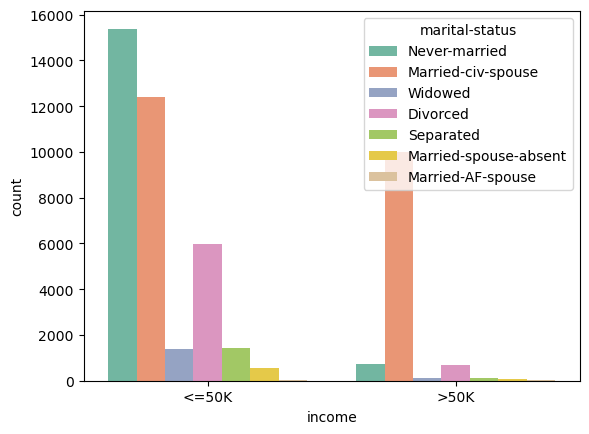

In [20]:
sns.countplot(data=df[cat_columns], x="income", hue="marital-status", palette="Set2")

In [21]:
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

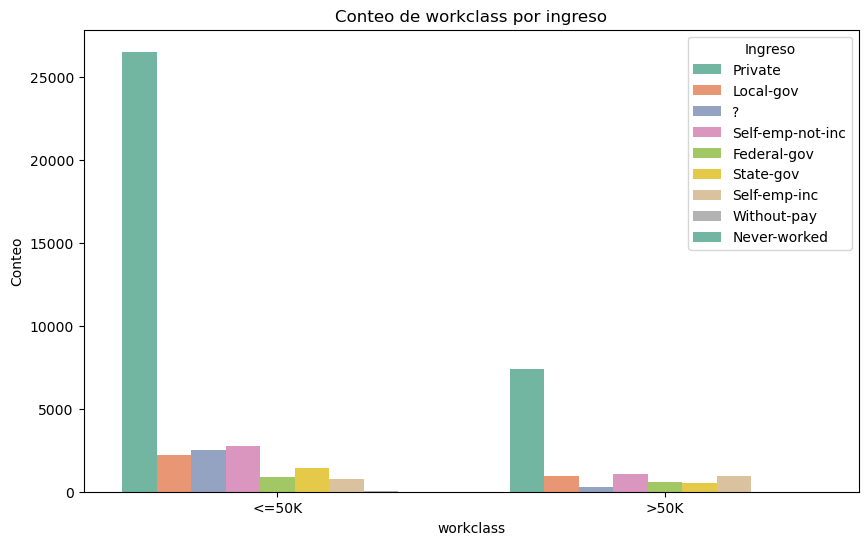

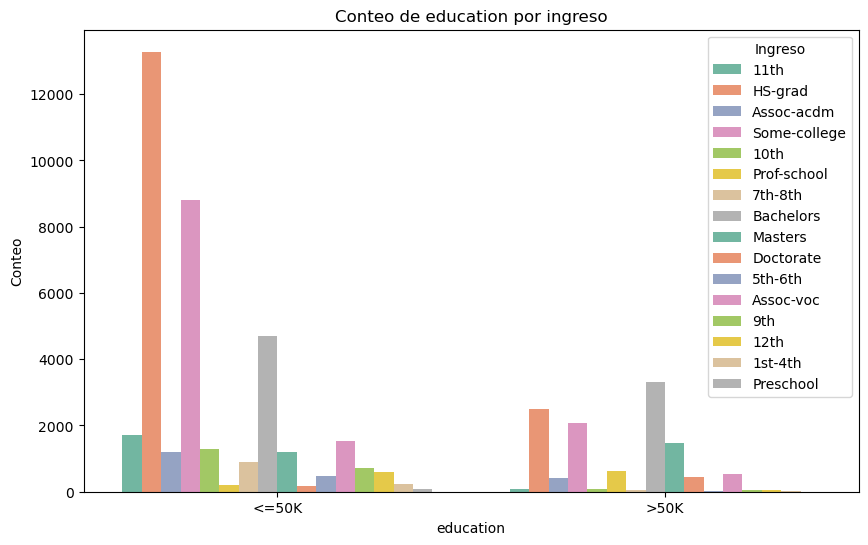

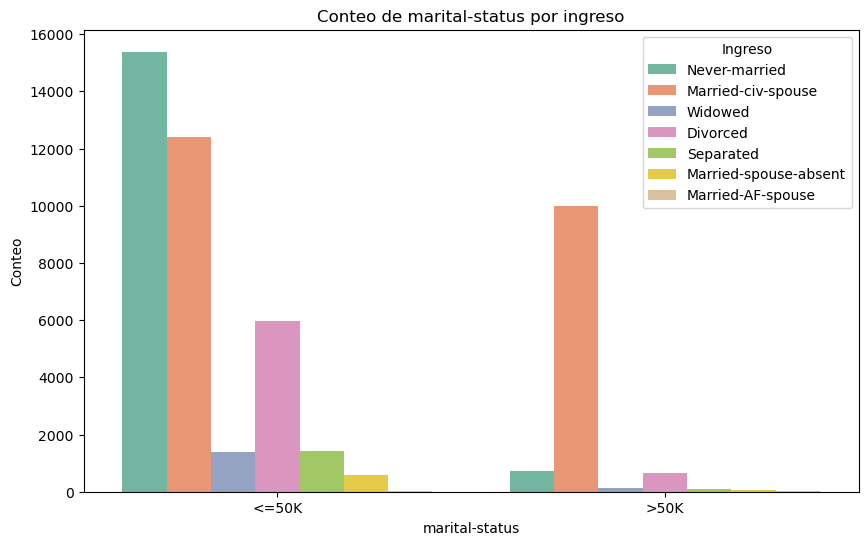

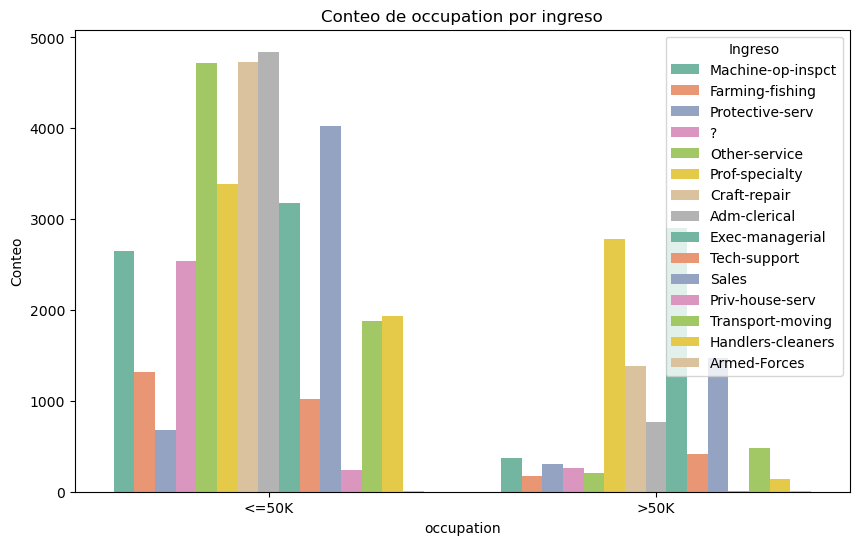

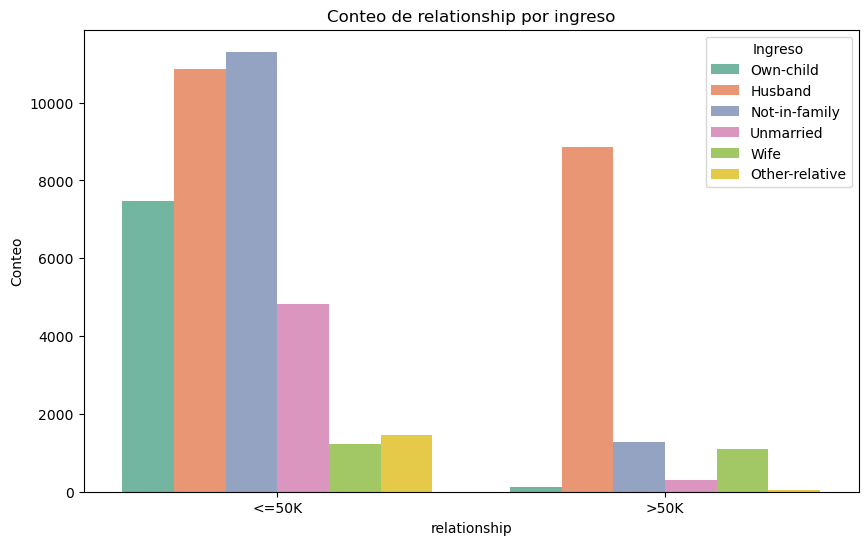

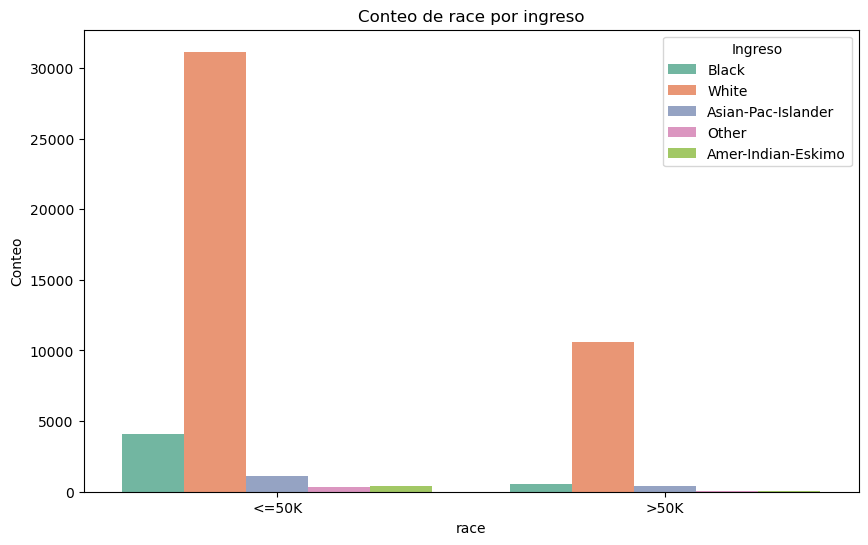

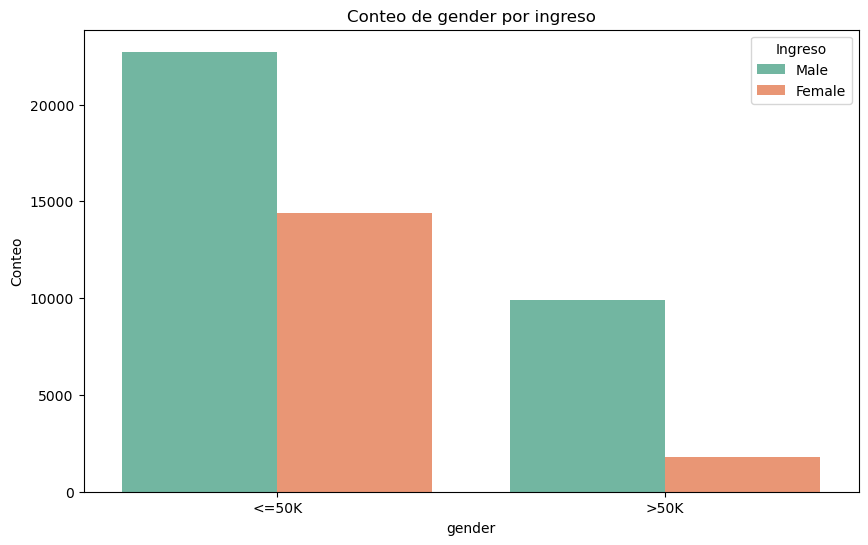

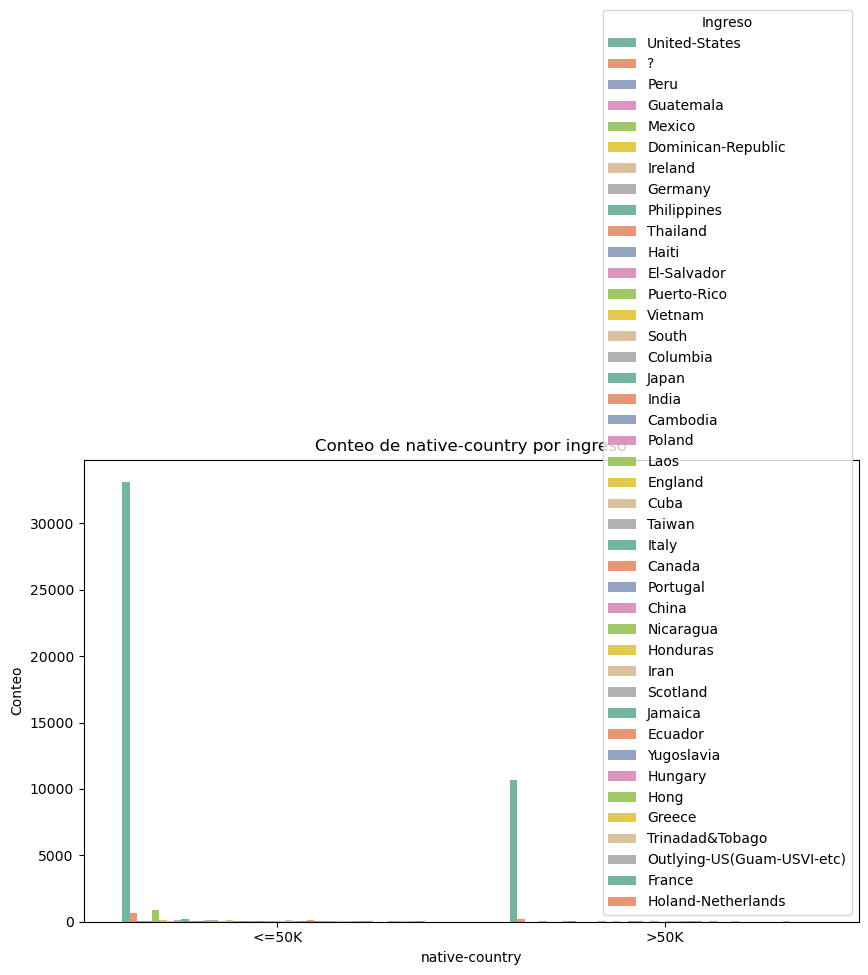

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\1756016438.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Ingreso')


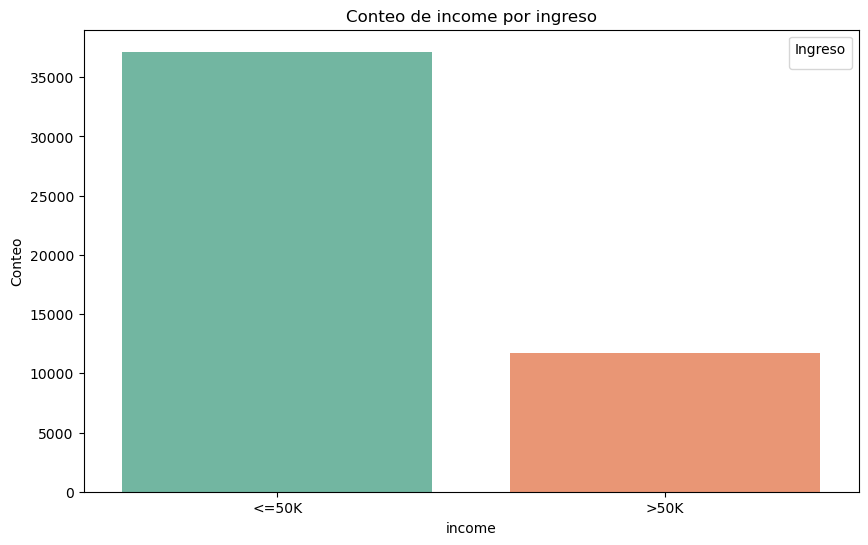

In [24]:
for col in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="income", hue=col, palette="Set2")
    plt.title(f'Conteo de {col} por ingreso')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.legend(title='Ingreso')
    plt.show()

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\2046437364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="income", y=col, palette="Set2")


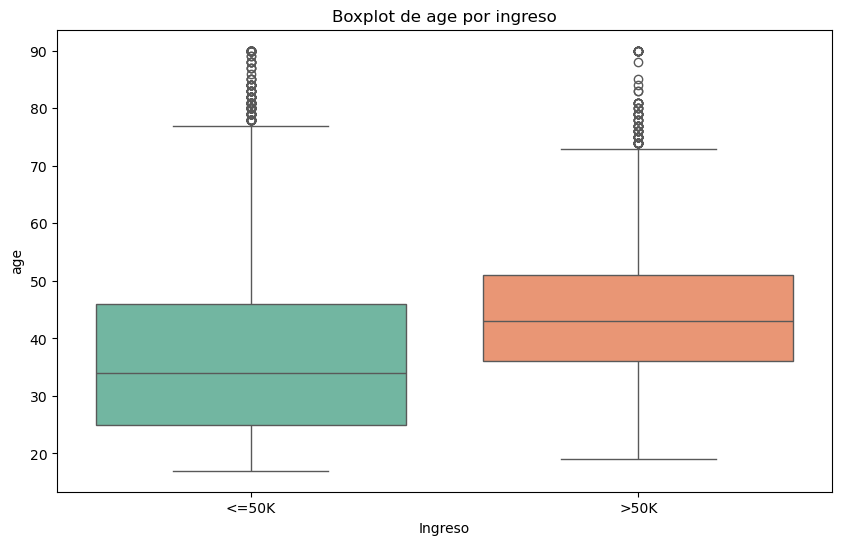

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\2046437364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="income", y=col, palette="Set2")


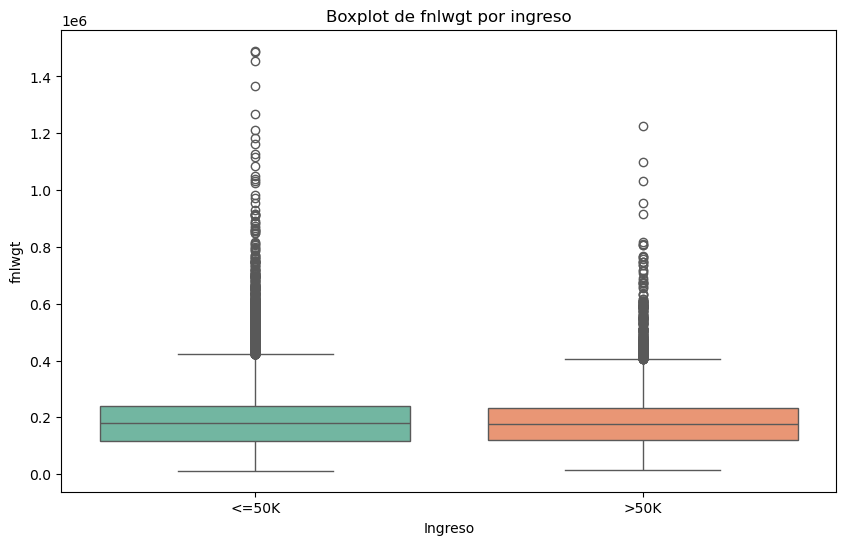

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\2046437364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="income", y=col, palette="Set2")


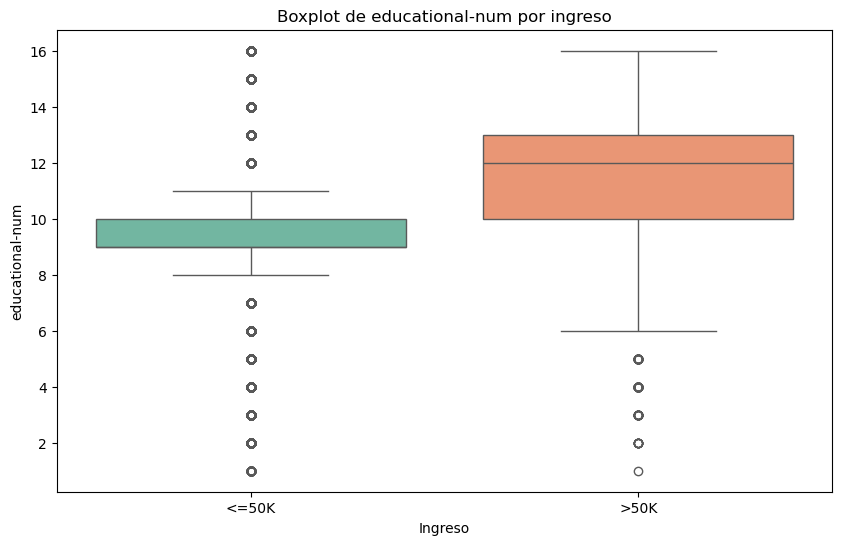

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\2046437364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="income", y=col, palette="Set2")


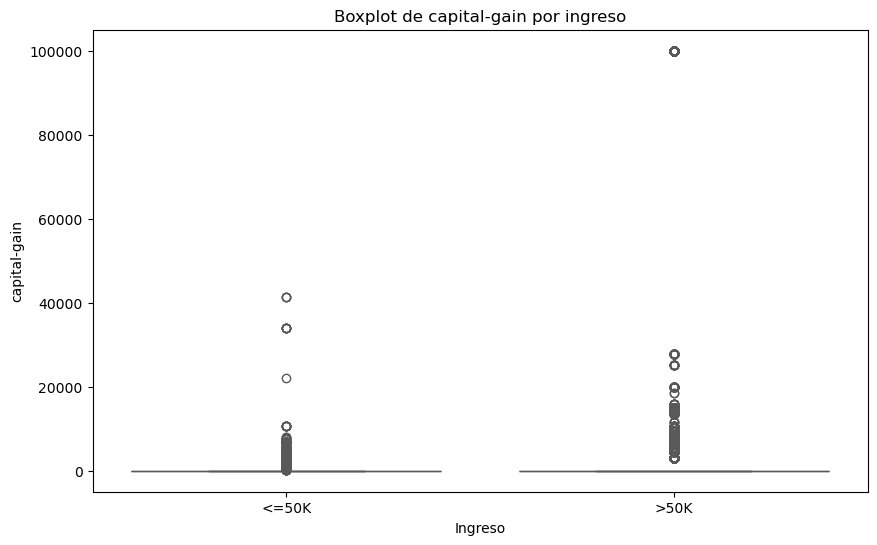

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\2046437364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="income", y=col, palette="Set2")


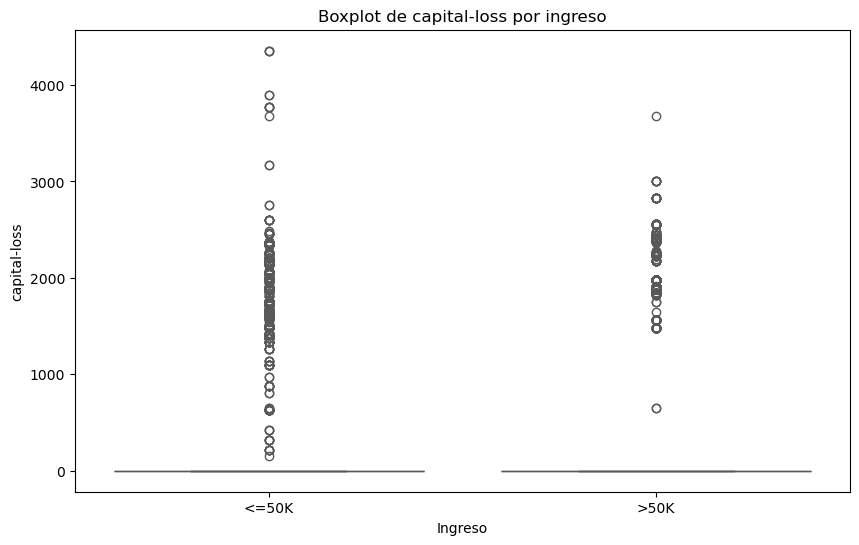

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_25880\2046437364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="income", y=col, palette="Set2")


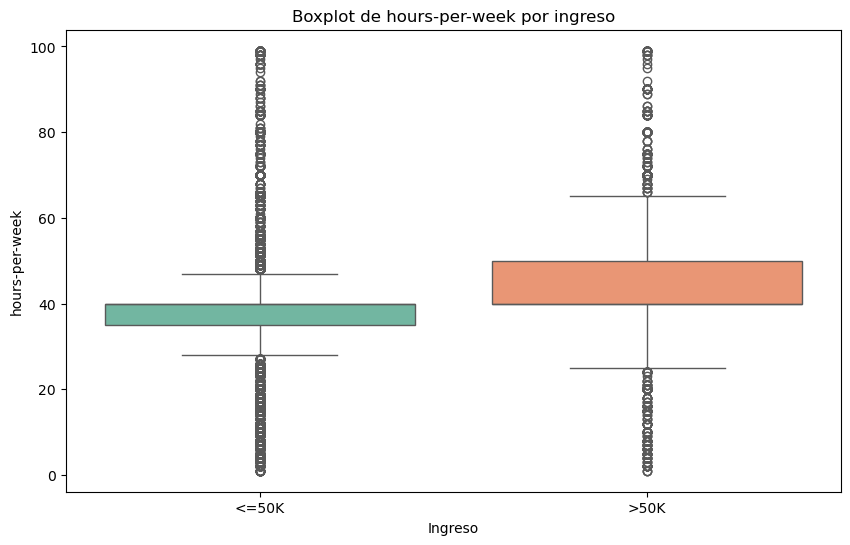

In [26]:
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="income", y=col, palette="Set2")
    plt.title(f'Boxplot de {col} por ingreso')
    plt.xlabel('Ingreso')
    plt.ylabel(col)
    plt.show()

### CONCLUSIONES

- Variables a eliminar: "fnlwgt": por su baja correlacion con la variable objetivo y su gran presencia de outliers, "native_country" es una posible candidata a eliminar debido a su baja correlacion con la variable objetivo, su presencia de nulos y muchos campos con solo un registro. AL tener tan pocas columnas en el dataset inicial tendremos que cosiderar la eliminacion.
- Variables correlacionadas: observamos que la variable educational_num es la mas correlacionada con la objetivo y de categoricas segun las V de Crammer son relationship y marital_status.
- Eliminacion de outliers: "fnlwgt"
- Codificacion de variable:la variable gender usaremos replace al ser una variable binaria, race, relationship, marital_status, workclass y occupation one-hot-encoding y native_country agrupacion.
- Transformaciones sobre variables a realizar: aplicar logaritmos a capital gain y capital loss


#### Variables a eliminar
- `fnlwgt`: Se podria eliminar debido a su baja correlación con la variable objetivo, alta varianza y una gran cantidad de outliers, lo cual podría afectar negativamente al modelo.
- `native_country`: Es una posible candidata a eliminar debido a:
  - Su baja correlación con la variable objetivo.
  - La presencia de valores nulos (`?`).
  - Su alta cardinalidad, ya que muchos países tienen muy pocos registros.  
  Dado el bajo número de columnas del dataset original, esta eliminación debe valorarse cuidadosamente.

#### Variables más correlacionadas
- La variable numérica `educational_num` es la más correlacionada con la variable objetivo `income`.
- Las variables categóricas más relacionadas con `income` según Cramér's V son:
  - `relationship`
  - `marital_status`

#### Eliminación de outliers
- Se eliminarán outliers en la variable `fnlwgt`, que presenta un número considerable de valores extremos según el análisis del IQR y los boxplots.

#### Codificación de variables categóricas
- `gender`: Codificación binaria mediante `.replace()`, ya que solo tiene dos categorías.
- `race`, `relationship`, `marital_status`, `workclass`, `occupation`: Se aplicará One-Hot Encoding.
- `native_country`: En caso de mantenerla, se agruparán los países con baja frecuencia bajo una categoría común: `"Other"`.

#### Transformaciones sobre variables numéricas
- Se aplicará la transformación logarítmica a las variables:
  - `capital_gain`
  - `capital_loss`  
  Esto se debe a su alta asimetría y concentración de valores en cero, lo que puede afectar la distribución y el rendimiento del modelo.